In [1]:
import pandas as pd
import numpy as np
import ruptures as rpt
from segmented import segmented_linear_regression
import matplotlib.pyplot as plt
%matplotlib inline

nile_flow = pd.read_csv('../../data/week3/Nile.dat').squeeze()
nile_flow.index = [i+1871 for i in range(nile_flow.shape[0])]

nile_flow.head()

1871    1120
1872    1160
1873     963
1874    1210
1875    1160
Name: // Volume of Nile river at Aswan 1871-1970 \chapter 1, dtype: int64

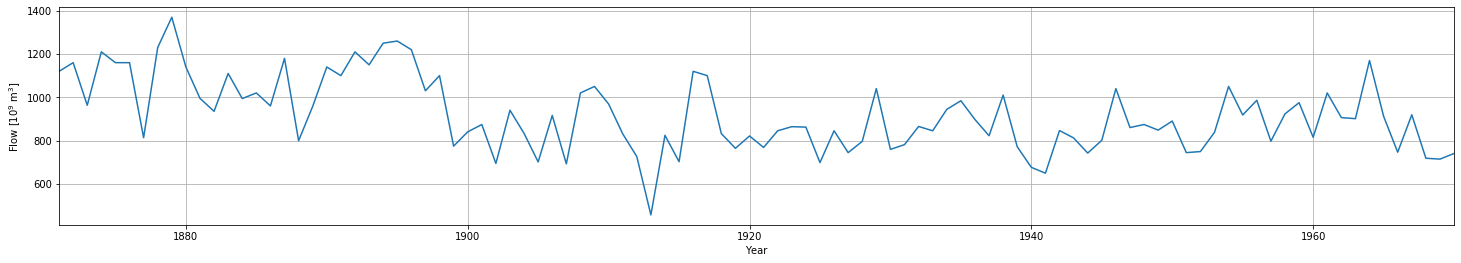

In [2]:
ax = nile_flow.plot(figsize=(25,4), grid=True)
ax.set_xlabel('Year')
ax.set_ylabel("Flow [10$^9$ m$^3$]");

### Using PELT

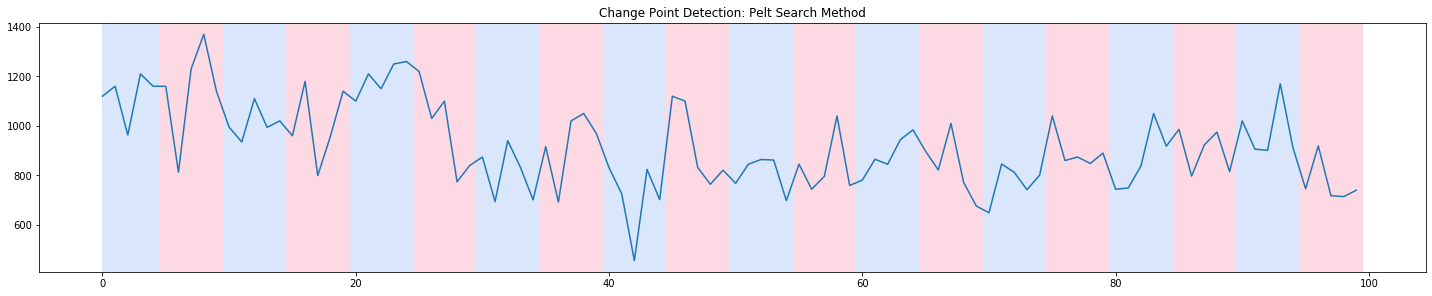

In [3]:
points = nile_flow.values
result = rpt.Pelt(model="rbf").fit(points).predict(pen=0)

fig, ax = rpt.display(points, result, figsize=(20, 4))
ax[0].set_title('Change Point Detection: Pelt Search Method');

### Using Segmented Linear Regression

In [21]:
x_break, y_break = segmented_linear_regression(
    x=nile_flow.index, 
    y=nile_flow.values, 
    breakpoints=[1910],
    n_iteration_max=10,
)

list(zip(x_break.round(1), y_break.round(1))) # coordinates

[(1871.0, 1161.0), (1918.7, 818.8), (1970.0, 884.8)]

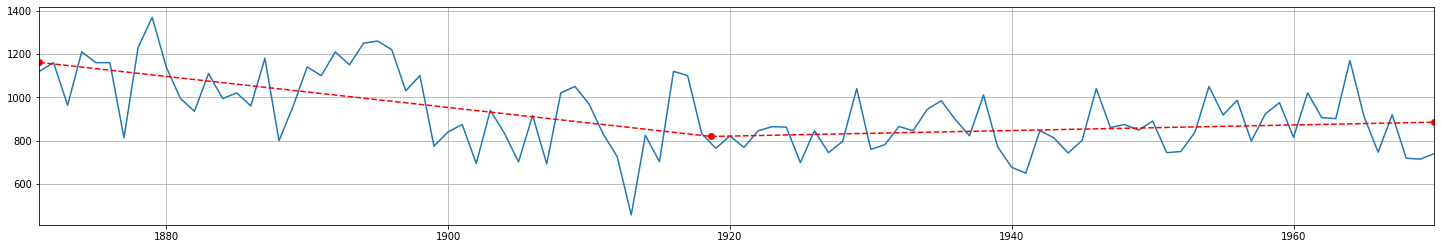

In [22]:
ax = nile_flow.plot(figsize=(25,4), grid=True)
ax.plot(x_break, y_break, 'r--')
ax.scatter(x_break, y_break, color='r')